In [440]:
import numpy as np
import pandas as pd
import scipy.stats as st
from pandas import datetime
import sklearn 
from sklearn import model_selection
import matplotlib.pyplot as plt

In [308]:
df = pd.read_csv("Desktop/Datathon Materials/311_service_requests.csv", encoding="ISO-8859-1")


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [330]:
newdata = pd.read_csv("Desktop/Datathon Materials/service_requests_df.csv", encoding="ISO-8859-1")
df1 = df
df = newdata

In [331]:
df['created_date']= pd.to_datetime(df['created_date'])
df['closed_date']= pd.to_datetime(df['closed_date'])


In [332]:
df = df.loc[df['created_date'] > pd.to_datetime('2012',format='%Y')]
df = df.loc[df['created_date'] < pd.to_datetime('2015',format='%Y')]

In [338]:
df.rename(columns = {'ntacode':'nta'},inplace=True)
df.shape

(50338, 24)

In [333]:
print('Shape of data (rows, columns):', df.shape, '\n')
print('Column Names: ', df.columns) # flagged means whether or not the article is incomplete or inaccurate


#df = df.drop(['Agency Name', 'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1',
#             'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Landmark',
#             'Resolution Action Updated Date', 'Community Board', 'Open Data Channel Type',
#             'Park Facility Name', 'Park Borough', 'Vehicle Type',
#       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
#       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment'], axis=1)



df['due_date']= pd.to_datetime(df['due_date'])
df['resolution_date']= pd.to_datetime(df['resolution_date'])

df.head()

Shape of data (rows, columns): (50338, 24) 

Column Names:  Index(['Unnamed: 0', 'Unnamed: 0.1', 'level_0', 'index', 'unique_key',
       'created_date', 'closed_date', 'agency_acronym', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'city', 'status', 'due_date',
       'resolution_date', 'community_board', 'borough', 'latitude',
       'longitude', 'ntacode'],
      dtype='object')


,Unnamed: 0,Unnamed: 0.1,level_0,index,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,...,street_name,city,status,due_date,resolution_date,community_board,borough,latitude,longitude,ntacode
0,0,0,256695,933420,23457559,2012-06-20 17:18:00,2012-06-21 14:00:00,DEP,Department of Environmental Protection,Water System,...,23 AVENUE,Whitestone,Closed,NaT,2012-06-21 14:00:00,07 QUEENS,QUEENS,40.778223,-73.819108,QN51
1,1,1,345645,1378069,24126232,2012-10-02 17:32:00,2012-10-03 12:00:00,DSNY,Queens West 03,Sanitation Condition,...,NaN,EAST ELMHURST,Closed,NaT,2012-10-03 12:00:00,03 QUEENS,QUEENS,40.764032,-73.877429,QN28
2,2,2,255875,929868,29093455,2014-10-18 10:04:00,2014-10-24 07:45:00,DEP,Department of Environmental Protection,Air Quality,...,EAST 69 STREET,BROOKLYN,Closed,NaT,2014-10-24 07:45:00,18 BROOKLYN,BROOKLYN,40.613646,-73.903105,BK45
3,3,3,265620,1035216,23564404,2012-07-06 20:36:00,2012-07-06 21:31:00,DEP,Department of Environmental Protection,Water System,...,NaN,NaN,Open,NaT,NaT,Unspecified BROOKLYN,BROOKLYN,NaN,NaN,BK43
4,4,4,146306,819497,24414552,2012-11-15 15:20:00,2012-12-09 14:15:00,DEP,Department of Environmental Protection,Water System,...,KISWICK STREET,STATEN ISLAND,Closed,NaT,2012-12-09 14:15:00,02 STATEN ISLAND,STATEN ISLAND,40.574748,-74.095665,SI45


In [380]:
d_311 = df.groupby(["nta"]).count()
d_311 = d_311.reset_index()
d_311 = d_311[["nta"]]
df

,Unnamed: 0,Unnamed: 0.1,level_0,index,unique_key,created_date,closed_date,agency_acronym,agency_name,complaint_type,...,latitude,longitude,nta,_unresolved_case,_count_overtime,Trans Fat_processing_time,Trans Fat_unresolved_case,z_processing_time,z_unresolved_case,z_count_overtime
0,0,0,256695,933420,23457559,2012-06-20 17:18:00,2012-06-21 14:00:00,DEP,Department of Environmental Protection,Water System,...,40.778223,-73.819108,QN51,False,False,0.862500,False,0.862500,False,False
1,1,1,345645,1378069,24126232,2012-10-02 17:32:00,2012-10-03 12:00:00,DSNY,Queens West 03,Sanitation Condition,...,40.764032,-73.877429,QN28,False,False,0.769444,False,0.769444,False,False
2,2,2,255875,929868,29093455,2014-10-18 10:04:00,2014-10-24 07:45:00,DEP,Department of Environmental Protection,Air Quality,...,40.613646,-73.903105,BK45,False,False,5.903472,False,5.903472,False,False
3,3,3,265620,1035216,23564404,2012-07-06 20:36:00,2012-07-06 21:31:00,DEP,Department of Environmental Protection,Water System,...,NaN,NaN,BK43,True,False,NaN,True,NaN,True,False
4,4,4,146306,819497,24414552,2012-11-15 15:20:00,2012-12-09 14:15:00,DEP,Department of Environmental Protection,Water System,...,40.574748,-74.095665,SI45,False,False,23.954861,False,23.954861,False,False
5,5,5,296444,1328859,23216201,2012-05-11 22:14:32,2012-06-19 15:06:02,DOHMH,Department of Health and Mental Hygiene,Food Establishment,...,40.612445,-73.982917,BK28,False,False,38.702431,False,38.702431,False,False
6,6,6,290707,1323122,23080233,2012-04-18 07:39:38,2012-04-25 11:29:47,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,...,40.825370,-73.905228,BX35,False,False,7.159826,False,7.159826,False,False
7,7,7,76647,654005,26897569,2013-12-16 12:31:00,2013-12-17 10:28:00,DEP,Department of Environmental Protection,Water System,...,40.672312,-73.731596,QN05,False,False,0.914583,False,0.914583,False,False
8,8,8,65909,303419,27250260,2014-01-27 03:27:28,NaT,DOHMH,Department of Health and Mental Hygiene,Smoking,...,40.702545,-73.904804,QN20,True,False,0.532431,True,0.532431,True,False
9,9,9,113902,776920,23274806,2012-05-22 22:12:00,2012-05-23 16:45:00,DEP,Department of Environmental Protection,Water System,...,40.713429,-73.780590,QN06,False,False,0.772917,False,0.772917,False,False


In [381]:
for i in df["complaint_type"].unique():
    df_temp = df.loc[df["complaint_type"] == i]
    df_temp["c_"+ i] = df_temp["complaint_type"] == i
    df_temp[i + "_processing_time"] =  (df_temp["resolution_date"]-df_temp["created_date"]).dt.total_seconds()/86400
    df_temp[i + "_unresolved_case"] =  (df_temp["status"] != "Closed")
    df_temp[i + "_count_overtime"] =  (df_temp["due_date"] < df_temp["closed_date"])
    d_311 = pd.merge(d_311, df_temp.groupby("nta").count().reset_index()[["nta", "c_" + i]], on = "nta", how = "left") 
    d_311 = pd.merge(d_311, df_temp.groupby("nta").sum().reset_index()[["nta", i + "_count_overtime", i + "_unresolved_case"]], on = "nta", how = "left") 
    df_temp.dropna(how="any",inplace=True)
    d_311 = pd.merge(d_311, df_temp.groupby("nta").mean().reset_index()[["nta", i + "_processing_time"]], on = "nta", how = "left")
    df_temp_overtime = df_temp.loc[df_temp[i + "_count_overtime"] == 1]
    df_temp_overtime[i + "_overtime"] = (df_temp["due_date"] - df_temp["closed_date"]).dt.total_seconds()/86400
    df_temp_overtime.dropna(how="any",inplace=True)
    d_311 = pd.merge(d_311, df_temp_overtime.groupby("nta").mean().reset_index()[["nta", i+ "_overtime"]], on = "nta", how = "left")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [407]:
d_311
d_311_final = d_311.dropna(axis=1,how='all')
d_311_final = d_311_final[d_311_final.columns[:-17]]
d_311_final.fillna(0)

,nta,c_Water System,Water System_count_overtime,Water System_unresolved_case,c_Sanitation Condition,Sanitation Condition_count_overtime,Sanitation Condition_unresolved_case,c_Air Quality,Air Quality_count_overtime,Air Quality_unresolved_case,...,Rodent_unresolved_case,Rodent_processing_time,Rodent_overtime,c_Water Quality,Water Quality_count_overtime,Water Quality_unresolved_case,c_Drinking,Drinking_count_overtime,Drinking_unresolved_case,Drinking_processing_time
0,BK09,36,0.0,0.0,14.0,0.0,0.0,15.0,0.0,0.0,...,2.0,14.001044,-5.492755,2.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,BK17,155,0.0,2.0,57.0,0.0,0.0,9.0,0.0,0.0,...,9.0,22.770472,-135.965376,5.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,BK19,58,0.0,0.0,31.0,0.0,0.0,13.0,0.0,0.0,...,1.0,10.357777,-50.132442,2.0,0.0,0.0,1.0,0.0,0.0,0.035012
3,BK21,54,0.0,2.0,18.0,0.0,0.0,8.0,0.0,0.0,...,1.0,16.860710,-10.040810,1.0,0.0,0.0,2.0,0.0,0.0,0.000000
4,BK23,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,19.786173,-23.554248,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,BK25,45,0.0,1.0,65.0,0.0,0.0,5.0,0.0,0.0,...,2.0,8.659428,-10.326968,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,BK26,41,0.0,0.0,30.0,0.0,0.0,7.0,0.0,0.0,...,1.0,5.384984,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
7,BK27,48,0.0,1.0,36.0,0.0,0.0,5.0,0.0,0.0,...,3.0,11.162329,-34.484942,2.0,0.0,0.0,2.0,0.0,0.0,0.175660
8,BK28,99,0.0,5.0,88.0,0.0,0.0,17.0,0.0,0.0,...,3.0,10.642405,-52.298831,3.0,0.0,0.0,2.0,0.0,0.0,0.062060
9,BK29,84,0.0,2.0,54.0,0.0,0.0,12.0,0.0,0.0,...,3.0,6.349291,-3.471829,2.0,0.0,0.0,2.0,0.0,0.0,0.074965


In [415]:
yvariable = pd.read_csv("Desktop/Datathon Materials/nta_data.csv")
yvariable.rename(columns={"NTA_Code":"nta"}, inplace=True)
unified = pd.merge(yvariable, d_311_final, on = "nta", how="inner")

In [422]:
(train, test) = sklearn.model_selection.train_test_split(unified, test_size=0.3)

In [427]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [435]:
X, y = train[['TotalPop', 'NYCHAperc',
       'DiversityScore', 'HealthIns', 'c_Water System',
       'Water System_count_overtime', 'Water System_unresolved_case',
       'c_Sanitation Condition', 'Sanitation Condition_count_overtime',
       'Sanitation Condition_unresolved_case', 'c_Air Quality',
       'Air Quality_count_overtime', 'Air Quality_unresolved_case',
       'c_Food Establishment', 'Food Establishment_count_overtime',
       'Food Establishment_unresolved_case',
       'Food Establishment_processing_time', 'Food Establishment_overtime',
       'c_Indoor Air Quality', 'Indoor Air Quality_count_overtime',
       'Indoor Air Quality_unresolved_case',
       'Indoor Air Quality_processing_time', 'Indoor Air Quality_overtime',
       'c_Smoking', 'Smoking_count_overtime', 'Smoking_unresolved_case',
       'Smoking_processing_time', 'c_Dirty Conditions',
       'Dirty Conditions_count_overtime', 'Dirty Conditions_unresolved_case',
       'c_Food Poisoning', 'Food Poisoning_count_overtime',
       'Food Poisoning_unresolved_case', 'Food Poisoning_processing_time',
       'Food Poisoning_overtime', 'c_Asbestos', 'Asbestos_count_overtime',
       'Asbestos_unresolved_case', 'c_Hazardous Materials',
       'Hazardous Materials_count_overtime',
       'Hazardous Materials_unresolved_case', 'c_Rodent',
       'Rodent_count_overtime', 'Rodent_unresolved_case',
       'Rodent_processing_time', 'Rodent_overtime', 'c_Water Quality',
       'Water Quality_count_overtime', 'Water Quality_unresolved_case',
       'c_Drinking', 'Drinking_count_overtime', 'Drinking_unresolved_case',
       'Drinking_processing_time']], train[['PreventHosp']]

In [454]:
clf = LassoCV()
sfm = SelectFromModel(clf, threshold=0.4)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


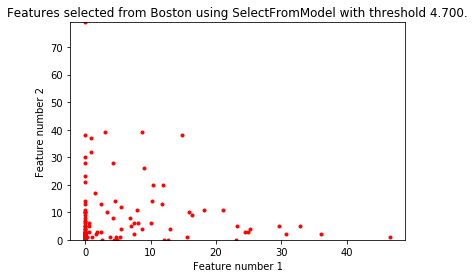

In [457]:
while n_features > 4:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [458]:
X_transform

array([[  0. ,   0. ,   5. ,  11. ],
       [ 24.5,   3. ,   0. ,  34. ],
       [  2.4,  13. ,   3. ,  57. ],
       [  2.5,   0. ,   5. ,  16. ],
       [  5.3,   1. ,   3. ,  42. ],
       [  0. ,   2. ,   2. ,  17. ],
       [  0. ,  13. ,   3. ,  15. ],
       [  0. ,   3. ,   3. ,  27. ],
       [ 15.6,   1. ,  36. ,  28. ],
       [  0. ,   1. ,   2. ,  12. ],
       [  1.6,   2. ,  37. ,  61. ],
       [  0. ,   2. ,   3. ,  19. ],
       [  0. ,   2. ,   7. ,  29. ],
       [  0. ,   1. ,   1. ,  13. ],
       [  0. ,   4. ,   7. ,  33. ],
       [  0. ,   1. ,   2. ,  15. ],
       [  4.7,   1. ,   2. ,  33. ],
       [  0. ,  10. ,   9. ,  25. ],
       [ 23.2,   5. ,   5. ,  21. ],
       [  0. ,  28. ,  10. ,  13. ],
       [  0. ,   3. ,  20. ,  71. ],
       [  0. ,   6. ,  32. ,  78. ],
       [  7.9,  11. ,  14. ,  78. ],
       [  3. ,  39. ,  26. ,  37. ],
       [  0. ,   2. ,   1. ,  16. ],
       [  0. ,   0. ,   2. ,  23. ],
       [  0. ,   0. ,  13. ,  26. ],
 

In [461]:
train.iloc[8,:]

Unnamed: 0                                     14
nta                                          BK33
TotalPop                                    40307
NYCHAperc                                    15.6
PreventHosp                                1973.3
DiversityScore                            85.7079
HealthIns                                    91.1
c_Water System                                 89
Water System_count_overtime                     0
Water System_unresolved_case                    1
c_Sanitation Condition                         50
Sanitation Condition_count_overtime             0
Sanitation Condition_unresolved_case            0
c_Air Quality                                  36
Air Quality_count_overtime                      0
Air Quality_unresolved_case                     0
c_Food Establishment                           18
Food Establishment_count_overtime              11
Food Establishment_unresolved_case              5
Food Establishment_processing_time        51.6756


In [45]:
u = df1.groupby("Borough").mean()
m = np.mean(u["response_time"])
st.chisquare(u["response_time"],[m]*5)

Power_divergenceResult(statistic=211.07211221780994, pvalue=1.562319327744015e-44)

In [117]:
democity = pd.read_csv("Desktop/Datathon Materials/demographics_city.csv")
demostate = pd.read_csv("Desktop/Datathon Materials/demographics.csv")
geog = pd.read_csv("Desktop/Datathon Materials/geographic.csv")
#df["nta"] = df.merge(geog, on="Zip code")

In [ ]:
demostate["year"] = pd.to_datetime(demostate["year"],format='%Y')
demostate_sample = demostate.resample("M")
demostate_sample["year"] = demostate_sample["year"].interpolate(method='linear')

In [409]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor


,NTA_Name,NTA_Code,TotalPop,Female,PopU18,Pop18t24,Pop25t44,Pop45t64,Pop65pl,Hispanic,...,NitricOxide,NitrogenDioxide,Ozone,SulfurDioxide,Daycares,AlcoholRetailers,TobaccoRetailers,FelonyCrime,PropertyCrime,ViolentCrime
0,New York City,NYC,8354889.0,52.4,21.4,10.1,31.4,24.6,12.5,28.8,...,19.5,18.9,31.4,0.6,11234.0,25.7,10.9,20.3,10.7,4.4
1,Brooklyn Heights-Cobble Hill,BK09,23532.0,51.0,12.8,9.4,42.2,22.5,13.1,8.9,...,32.0,23.7,28.4,0.5,21.0,33.1,7.2,11.6,7.4,1.7
2,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,BK17,63459.0,53.6,19.1,7.4,25.3,29.7,18.6,7.1,...,16.5,16.9,33.0,0.4,71.0,21.3,9.6,16.5,9.5,3.0
3,Brighton Beach,BK19,33146.0,53.1,17.6,7.4,24.5,28.4,22.1,12.4,...,18.7,18.0,32.5,0.5,39.0,18.7,8.1,16.1,9.5,4.1
4,Seagate-Coney Island,BK21,29229.0,53.1,22.5,12.2,21.2,24.9,19.3,24.9,...,14.9,15.8,33.7,0.4,27.0,23.9,10.6,32.2,15.5,6.8
5,West Brighton,BK23,14977.0,58.8,7.6,5.3,18.8,31.9,36.3,0.5,...,17.1,17.0,32.7,0.4,6.0,8.7,4.0,14.3,10.3,1.6
6,Homecrest,BK25,43565.0,51.7,26.1,8.3,27.5,23.2,14.9,7.3,...,20.0,19.4,31.6,0.5,39.0,19.7,10.1,12.9,7.3,3.0
7,Gravesend,BK26,28944.0,55.0,21.1,8.3,25.8,24.2,20.6,13.9,...,16.3,17.2,32.8,0.4,19.0,13.8,7.9,17.0,9.8,3.2
8,Bath Beach,BK27,32002.0,49.1,20.2,7.4,31.7,24.7,15.9,15.2,...,17.7,18.8,31.8,0.4,23.0,15.0,10.0,9.7,4.6,2.3
9,Bensonhurst West,BK28,90834.0,51.3,21.0,8.6,29.6,26.0,14.8,15.1,...,18.6,20.2,31.2,0.5,51.0,15.9,11.1,10.4,5.5,2.5


In [145]:
comhealth1 = comhealth.loc[comhealth["county_name"] == 'New York City']
comhealth1 = comhealth1.append(comhealth.loc[comhealth["county_name"] == "Queens"])
comhealth1 = comhealth1.append(comhealth.loc[comhealth["county_name"] == 'Bronx'])

In [150]:
comhealth1["indicator"].unique()

array(['Percentage of births within 24 months of previous pregnancy',
       'Pregnancy rate per 1,000 (all pregnancies/female population aged 15-44 years)',
       'Teen pregnancy rate per 1,000 females aged 10-14 years',
       'Teen pregnancy rate per 1,000 females aged 15-17 years',
       'Teen pregnancy rate per 1,000 females aged 15-19 years',
       'Teen pregnancy rate per 1,000 females aged 18-19 years',
       'Abortion ratio (induced abortions per 1,000 live births) - Aged 15-19 years',
       'Abortion ratio (induced abortions per 1,000 live births) - All ages',
       'Percentage of births to women aged 25 years and older without a high school education',
       'Percentage of births to out-of-wedlock mothers',
       'Percentage of births that were first births',
       'Percentage of births to teens - Aged 15-17 years',
       'Percentage of births that were multiple births',
       'Percentage of births with early (1st trimester) prenatal care',
       'Unintentional i

In [151]:
len(comhealth["lat_long"].unique())

63

In [113]:
comhealth["indicator"].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Capital Region',
       'Cattaraugus', 'Cayuga', 'Central NY', 'Chautauqua', 'Chemung',
       'Chenango', 'Clinton', 'Columbia', 'Cortland', 'Delaware',
       'Dutchess', 'Erie', 'Essex', 'Finger Lakes', 'Franklin', 'Fulton',
       'Genesee', 'North Country', 'Greene', 'Hamilton', 'Herkimer',
       'Jefferson', 'Kings', 'Lewis', 'Livingston', 'Long Island',
       'Madison', 'Mid-Hudson', 'Mohawk Valley', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'New York City', 'New York State', 'Niagara',
       'Oneida', 'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego',
       'Otsego', 'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'Southern Tier', 'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan',
       'Tioga', 'Tompkins', 'Tug Hill Seaway', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Western NY', 'Wyoming',
       'Yates

In [181]:
democity

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402
5,Baisley Park,Queens,QN76,34603,2198,2389,2569,2923,2699,2430,...,820,941,1575,2186,1532,1718,629,307,59357,72664
6,Bath Beach,Brooklyn,BK27,29931,1766,1668,1672,1581,1922,2234,...,1091,932,1407,2016,1176,1606,711,521,55193,76037
7,Battery Park City-Lower Manhattan,Manhattan,MN25,39699,2272,1055,691,1453,5203,7559,...,800,609,960,1909,2416,3878,2377,6650,125434,185275
8,Bay Ridge,Brooklyn,BK31,78607,4571,3998,3772,3802,4700,7214,...,3575,3067,4056,5848,4154,4869,2498,2406,57980,82209
9,Bayside-Bayside Hills,Queens,QN46,43808,2106,2199,2353,2694,2504,2832,...,1284,1073,1680,2506,2360,3047,1710,1276,79120,94806
